<a href="https://colab.research.google.com/github/ferperezh/IIC3633_ProyectoMetricaDiversidad/blob/main/musica/musica_metrica_diversidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métrica **Diversidad de Usuario** en la Música

## Importar los datos
Es necesario agregar el archivo "kaggle.json" disponible en el repositorio al entorno de archivos del Colab:
- https://github.com/ferperezh/IIC3633_ProyectoMetricaDiversidad/blob/main/kaggle.json

El cual son los API de autorización de kaggle para poder descargar los dataset necesarios para la música.

In [87]:
import os

parent_dir = os.path.dirname(os.getcwd())

# Crear el directorio .kaggle
os.makedirs(os.path.join(parent_dir, '.kaggle'), exist_ok=True)

# Mover el archivo kaggle.json al directorio .kaggle
!cp {parent_dir}/kaggle.json {parent_dir}/.kaggle/

# Cambiar los permisos del archivo kaggle.json para asegurar privacidad
!chmod 600 ~/.kaggle/kaggle.json


In [88]:
!pip install kaggle


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [89]:
# Descargar el dataset
!kaggle datasets download -d saurabhshahane/music-dataset-1950-to-2019

# Descomprimir el archivo zip descargado
import zipfile
with zipfile.ZipFile("music-dataset-1950-to-2019.zip", 'r') as zip_ref:
    zip_ref.extractall("music_dataset")

print("Path to dataset files: music_dataset")

Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/music-dataset-1950-to-2019
License(s): Attribution 4.0 International (CC BY 4.0)
music-dataset-1950-to-2019.zip: Skipping, found more recently modified local copy (use --force to force download)
Path to dataset files: music_dataset


In [90]:
# Descargar el dataset de Last.fm
!kaggle datasets download -d harshal19t/lastfm-dataset

# Descomprimir el archivo zip descargado
import zipfile
with zipfile.ZipFile("lastfm-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("lastfm_dataset")

print("Path to dataset files: lastfm_dataset")

Dataset URL: https://www.kaggle.com/datasets/harshal19t/lastfm-dataset
License(s): copyright-authors
lastfm-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Path to dataset files: lastfm_dataset


## Procesamiento de Datasets Musicales
Considerar que se hace un join entre el `music_dataset` y `LastFM`, para obtener datos musicales que tienen metadata y datos de uso por diferentes usuarios.

In [91]:

!pip install pandas

import pandas as pd

music_data = pd.read_csv("music_dataset/tcc_ceds_music.csv")
lastfm = pd.read_csv("lastfm_dataset/Last.fm_data.csv")


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


Agregamos una columna `artist_song` para ambas tablas que es el nombre del artista más el nombre de la canción unida por un guíon. Así con esta tabla unimos la infromacion de cada usaurio y su canciones prefereidas con la infromación de esa canción.

In [92]:
# Renombrar las columnas para que coincidan, si es necesario
# Asegúrate de ajustar los nombres de las columnas según correspondan
music_data.rename(columns={'artist_name': 'artist_song'}, inplace=True)
lastfm.rename(columns={'Artist': 'artist_song'}, inplace=True)

Revisamos que no hay valores nulos en ninguna de las tablas originales para ver si se tuvo que haber hecho una limpieza antes. Pero vemos que lo unicos valores NaN son los albums que no importaran para los datos.

In [93]:
# Ver los valores Nan
print(music_data.isnull().sum())
print(lastfm.isnull().sum())

Unnamed: 0                  0
artist_song                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
like/girls                  0
sadness                     0
feelings                    0
danceability                0
loudness                    0
acousticness                0
instrumentalness            0
valence                     0
energy                      0
topic                       0
age                         0
dtype: int64
Unnamed: 0      0
Username        0
artist_song     0
Tra

Luego hacemos el join o merge para juntar los metadatos de las decisiones de usuario.

In [94]:
# Realizar la unión de los datasets
usuario_music_data = pd.merge(music_data, lastfm, on='artist_song', how='inner')

# Verificar el resultado
print(f"Tamaño del dataset unido: {usuario_music_data.shape}")
usuario_music_data

Tamaño del dataset unido: (3482, 37)


,Unnamed: 0_x,artist_song,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,valence,energy,topic,age,Unnamed: 0_y,Username,Track,Album,Date,Time
0,5100,10cc,sand in my face,1973,pop,look mirror look stone weakling dynamic tensio...,77,0.001422,0.369306,0.001422,...,0.869126,0.800795,violence,0.671429,59928,franhale,I'm Not in Love,20th Century Masters: The Millennium Collectio...,31 Jan 2021,15:16
1,5100,10cc,sand in my face,1973,pop,look mirror look stone weakling dynamic tensio...,77,0.001422,0.369306,0.001422,...,0.869126,0.800795,violence,0.671429,193896,Knapster01,Dreadlock Holiday,Bloody Tourists,26 Jan 2021,18:43
2,5100,10cc,sand in my face,1973,pop,look mirror look stone weakling dynamic tensio...,77,0.001422,0.369306,0.001422,...,0.869126,0.800795,violence,0.671429,243088,jonocole,Dreadlock Holiday,Bloody Tourists,26 Jan 2021,18:43
3,5100,10cc,sand in my face,1973,pop,look mirror look stone weakling dynamic tensio...,77,0.001422,0.369306,0.001422,...,0.869126,0.800795,violence,0.671429,252573,Orlenay,I'm Not in Love,The Original Soundtrack,29 Jan 2021,22:09
4,5267,10cc,headline hustler,1973,pop,local paper everybody think nice better look t...,85,0.001316,0.001316,0.026046,...,0.655812,0.753746,obscene,0.671429,59928,franhale,I'm Not in Love,20th Century Masters: The Millennium Collectio...,31 Jan 2021,15:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,82431,$uicideboy$,you're now tuning into 66.6 fm with dj rapture...,2019,hip hop,sink fuck spine second guess crime snort slug ...,43,0.002024,0.002024,0.002024,...,0.268343,0.770764,obscene,0.014286,156335,massdosage,Individuality Was So Last Year,LIVE FAST DIE WHENEVER,30 Jan 2021,11:04
3478,82431,$uicideboy$,you're now tuning into 66.6 fm with dj rapture...,2019,hip hop,sink fuck spine second guess crime snort slug ...,43,0.002024,0.002024,0.002024,...,0.268343,0.770764,obscene,0.014286,156336,massdosage,DON'T TRUST ANYONE!,LIVE FAST DIE WHENEVER,30 Jan 2021,11:02
3479,82431,$uicideboy$,you're now tuning into 66.6 fm with dj rapture...,2019,hip hop,sink fuck spine second guess crime snort slug ...,43,0.002024,0.002024,0.002024,...,0.268343,0.770764,obscene,0.014286,156337,massdosage,Sour Grapes,LIVE FAST DIE WHENEVER,30 Jan 2021,10:59
3480,82431,$uicideboy$,you're now tuning into 66.6 fm with dj rapture...,2019,hip hop,sink fuck spine second guess crime snort slug ...,43,0.002024,0.002024,0.002024,...,0.268343,0.770764,obscene,0.014286,156338,massdosage,Killing 2 Birds With 22 Stones,LIVE FAST DIE WHENEVER,30 Jan 2021,10:57


In [95]:
usuario_music_data.columns

Index(['Unnamed: 0_x', 'artist_song', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age', 'Unnamed: 0_y', 'Username', 'Track', 'Album', 'Date',
       'Time'],
      dtype='object')

In [96]:
# Instalar scikit-learn
!pip install scikit-learn

# Importar el módulo después de instalar
from sklearn.model_selection import train_test_split

# Dividir el dataset en una muestra representativa mínima
# Estratificaremos por 'Username' para garantizar que haya representación de usuarios
train, test = train_test_split(
    usuario_music_data,
    test_size=0.1,  # Reducir a un 10% el tamaño del dataset total
    stratify=usuario_music_data['Username'],
    random_state=42
)

# Verificar tamaños de los subconjuntos
print(f"Tamaño del conjunto de entrenamiento: {train.shape}")
print(f"Tamaño del conjunto de prueba: {test.shape}")


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Tamaño del conjunto de entrenamiento: (3133, 37)
Tamaño del conjunto de prueba: (349, 37)


## Categorización de cada usuario
Obtenemos el top k=5 de categorias de cada usuario

In [97]:
# Calcular las K categorías más escuchadas por usuario en el conjunto reducido
k = 3
user_genre_df = train[['Username', 'genre']]

# Top K géneros más escuchados
top_k_categories = (
    user_genre_df.groupby(['Username', 'genre'])
    .size()
    .reset_index(name='count')
    .sort_values(['Username', 'count'], ascending=[True, False])
    .groupby('Username')
    .head(k)
)

# Mostrar los resultados
print("Top K géneros más escuchados por usuario:")
print(top_k_categories)

Top K géneros más escuchados por usuario:
      Username    genre  count
2      Babs_05      pop    393
3      Babs_05     rock     77
0      Babs_05  hip hop     45
7   Knapster01      pop    334
8   Knapster01   reggae    151
9   Knapster01     rock     79
11     Orlenay      pop     75
12     Orlenay   reggae     33
13     Orlenay     rock     10
16      eartle      pop    222
18      eartle     rock     41
17      eartle   reggae     31
21    franhale      pop    830
23    franhale     rock    118
19    franhale  hip hop     32
26    jonocole      pop    261
28    jonocole     rock     42
27    jonocole   reggae     31
31  massdosage      pop    213
32  massdosage     rock     40
30  massdosage     jazz      8


# Generar Recomendaciones

Se probará con diferentes métodos de recomendación para evaluar los resultados del modelo:


## Método Most Popular:
Recomienda las canciones más escuchadas en el conjunto global de datos de entrenamiento.
- Cuenta y ordena las canciones según número de reproducciones
- Selecciona las `k canciones` más populares
- Alta probabilidad de recomendar contenido con hartas visualizaciones
- Mismo resultado para todos los usuarios
- Baja diversidad de recomendaciones

### Procesamiento de Datos para Most Popular
Usar el metodo Most popular tomaremos las canciones descargadas/escuhadas por cada usuario como las canciones que quieren cada usaurio. Por lo que agregamos una columna llamada `Popularity` a la tabla de canciones que seria la cantidad de usaurios o veces que se descarga una cancion. Para luego recomendar canciones a cada usuario.


In [98]:
data_music = usuario_music_data[["Username", "artist_song", "genre"]]

In [99]:
# Poner numeros a username para indentificarlos a los artist_song un numero
dict_username = {}
dict_username_reverse = {}
for i, username in enumerate(data_music['Username'].unique()):
    dict_username[username] = i
    dict_username_reverse[i] = username

dict_artist_song = {}
dict_artist_song_reverse = {}
for i, artist_song in enumerate(data_music['artist_song'].unique()):
    dict_artist_song[artist_song] = i
    dict_artist_song_reverse[i] = artist_song

In [100]:
data_music['user_id'] = data_music['Username'].map(dict_username)
data_music['artist_song_id'] = data_music['artist_song'].map(dict_artist_song)
data_music.head()

/var/folders/2s/1hvpny4j17scrm637kv0r9gh0000gn/T/ipykernel_3808/3149221389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_music['user_id'] = data_music['Username'].map(dict_username)
/var/folders/2s/1hvpny4j17scrm637kv0r9gh0000gn/T/ipykernel_3808/3149221389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_music['artist_song_id'] = data_music['artist_song'].map(dict_artist_song)


,Username,artist_song,genre,user_id,artist_song_id
0,franhale,10cc,pop,0,0
1,Knapster01,10cc,pop,1,0
2,jonocole,10cc,pop,2,0
3,Orlenay,10cc,pop,3,0
4,franhale,10cc,pop,0,0


Ahora con todos los dataset dividos la data en `train` y `test`. Dejando por usuario una sección del 80% del usuario para el train y un 20% por usuario para el test.

In [101]:
from sklearn.model_selection import train_test_split

data_music_train = []
data_music_test = []

for user in data_music["user_id"].unique():
    user_data = data_music[data_music["user_id"] == user]
    train, test = train_test_split(user_data, test_size=0.2, random_state=42)
    data_music_train.append(train)
    data_music_test.append(test)


# Transformarlo a dataframe
data_music_train = pd.concat(data_music_train)
data_music_test = pd.concat(data_music_test)

In [102]:
data_music_test

,Username,artist_song,genre,user_id,artist_song_id
3046,franhale,grandson,rock,0,21
536,franhale,my bloody valentine,pop,0,2
864,franhale,blink-182,pop,0,5
3068,franhale,twenty one pilots,rock,0,8
1702,franhale,blink-182,pop,0,5
...,...,...,...,...,...
2613,massdosage,mujo,jazz,6,18
179,massdosage,a-ha,pop,6,1
356,massdosage,my bloody valentine,pop,6,2
1306,massdosage,blink-182,pop,6,5


### Obtención de Top K Categorías

Creamos una funcion para obtener los top k de categorias por usuario.

In [103]:
def get_top_k_categories(df, k):
  user_genre_df = df[['Username', 'genre']]

  # Calcular las k categorías más escuchadas por cada usuario
  top_k_5_categories = (
      user_genre_df.groupby(['Username', 'genre'])
      .size()  # Contar ocurrencias de cada género por usuario
      .reset_index(name='count')  # Resetear índice y nombrar la columna de conteo
      .sort_values(['Username', 'count'], ascending=[True, False])  # Ordenar por usuario y luego por conteo descendente
      .groupby('Username')  # Agrupar por usuario para obtener los top-k
      .head(k)  # Tomar los K géneros más escuchados por usuario
  )

  return top_k_5_categories

### Recomendación de Most Popular

Recomienda las canciones más escuchadas en el conjunto global de datos de entrenamiento.
- Cuenta y ordena las canciones según número de reproducciones
- Selecciona las `k canciones` más populares
- Alta probabilidad de recomendar contenido con hartas visualizaciones
- Mismo resultado para todos los usuarios
- Baja diversidad de recomendaciones

In [104]:
def recommend_most_popular(user, data_train, k=10):
  # Agrugar por canciones contando la cantidad de apariciones
  data_song_count = data_train.groupby('artist_song_id')['artist_song_id'].count().reset_index(name='popularity')
  # Colocar los nombres de las canciones
  data_song_count['artist_song'] = data_song_count['artist_song_id'].map(dict_artist_song_reverse)


  # Ordenar por popularity
  data_song_count = data_song_count.sort_values('popularity', ascending=False)
  top_k_popular_artist_song = data_song_count.head(k)

  top_k_popular_artist_song = top_k_popular_artist_song['artist_song'].tolist()

  return top_k_popular_artist_song



## Método Random
Recomienda canciones de manera aleatoria del conjunto de entrenamiento.
- Selecciona `k` canciones aleatorias
- Usado como baseline para comparaciones
- Debiese mostrar un aumento en la diversidad de las recomendaciones

In [105]:
import random

def recommend_random(user, data_train, k=10):
  # Obtener todas las canciones unicas
  unique_songs = data_train['artist_song'].unique()

  # Seleccionar k canciones aleatorias
  random_songs = random.sample(list(unique_songs), min(k, len(unique_songs)))

  return random_songs



## Método IKNN
 Recomienda canciones usando filtrado colaborativo basado en usuarios (IKNN - Item K-Nearest Neighbors).

 - Calcula la similitud entre usuarios basada en las canciones que han escuchado
 - Usa `similitud coseno` para encontrar los k usuarios más similares
 - Recomienda canciones que los usuarios similares han escuchado pero el usuario actual no

In [106]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

class MusicIKNN:
    def __init__(self, k=20):
        self.k = k
        self.item_similarity = None
        self.item_ids = None
        self.user_ids = None
        
    def _create_user_item_matrix(self, df):
        """
        Crea matriz usuario-item a partir del dataframe
        """
        # Crear mapeos de IDs únicos
        unique_users = df['user_id'].unique()
        unique_items = df['artist_song'].unique()
        self.user_ids = {user: idx for idx, user in enumerate(unique_users)}
        self.item_ids = {item: idx for idx, item in enumerate(unique_items)}
        
        # Crear matriz de interacciones
        rows = []
        cols = []
        data = []
        
        for _, row in df.iterrows():
            user_idx = self.user_ids[row['user_id']]
            item_idx = self.item_ids[row['artist_song']]
            rows.append(user_idx)
            cols.append(item_idx)
            data.append(1)  # 1 para indicar interacción
            
        return csr_matrix((data, (rows, cols)), 
                         shape=(len(unique_users), len(unique_items)))
    
    def fit(self, df):
        """
        Entrena el modelo con el dataframe de interacciones
        """
        # Crear matriz usuario-item
        self.user_item_matrix = self._create_user_item_matrix(df)
        
        # Calcular similitud entre items
        self.item_similarity = cosine_similarity(self.user_item_matrix.T)
        # Evitar que la similitud consigo mismo sea 1
        np.fill_diagonal(self.item_similarity, 0)
        
        return self
    
    def recommend(self, username, df, n_recommendations=10):
        """
        Genera recomendaciones para un usuario
        """
        if username not in self.user_ids:
            print(f"Usuario {username} no encontrado en el dataset")
            return []
        
        # Obtener índice del usuario
        user_idx = self.user_ids[username]
        
        # Obtener vector de interacciones del usuario
        user_vector = self.user_item_matrix[user_idx].toarray().flatten()
        
        # Calcular predicciones
        predictions = self._predict(user_vector)
        
        # Poner -inf en items ya escuchados
        predictions[user_vector > 0] = float('-inf')
        
        # Obtener top N recomendaciones
        top_idx = np.argsort(predictions)[::-1][:n_recommendations]
        
        # Convertir índices a nombres de canciones
        reverse_item_ids = {v: k for k, v in self.item_ids.items()}
        recommendations = [reverse_item_ids[idx] for idx in top_idx]
        
        return recommendations
    
    def _predict(self, user_vector):
        """
        Genera predicciones para un vector de usuario
        """
        # Calcular predicciones usando similitud de items
        predictions = np.dot(self.item_similarity, user_vector)
        
        # Normalizar predicciones
        sim_sums = np.sum(np.abs(self.item_similarity), axis=0)
        sim_sums[sim_sums == 0] = 1  # Evitar división por cero
        predictions = predictions / sim_sums
        
        return predictions

## Método Híbrido
Método híbrido que combina popularidad con similtud de géneros según parámetro `alpha`.

Basado parcialmente en el [Siguiente Articulo](https://marketsy.ai/blog/hybrid-recommender-systems-beginners-guide).

- `alpha`: Parámetro para balancear entre popularidad global (`1-alpha`) y preferencias de género del usuario (`alpha`)
- Balance entre descubrimiento y relevancia de la recomendación



In [107]:
def recommend_hybrid(user, data_train, k=10, alpha=0.5):
  # Calcular los scores de popularidad de canciones
  popularity_scores = data_train.groupby('artist_song_id')['user_id'].count().to_dict()
  max_popularity = max(popularity_scores.values())
  min_popularity = min(popularity_scores.values())
  normalized_popularity = {song: count/max_popularity for song, count in popularity_scores.items()}

  # Obtener los generos preferidos del usuario
  user_songs = data_train[data_train['user_id'] == user]
  user_genres = user_songs['genre'].value_counts().to_dict()
  total_user_songs = sum(user_genres.values())
  prefered_user_genres = {genre: count/total_user_songs for genre, count in user_genres.items()}

  # Calcular el score combinado hibrido
  hybrid_scores = {}
  for song in data_train['artist_song'].unique():
    # Score de popularidad
    song_popularity = normalized_popularity.get(song, 0)

    # Score de genero
    song_genres = data_train[data_train['artist_song'] == song]['genre'].iloc[0]
    genre_score = prefered_user_genres.get(song_genres, 0)

    # Combinar Scores de popularidad y genero
    hybrid_scores[song] = (1-alpha) * song_popularity + (alpha) * genre_score

  # Filtrar las canciones ya escuchadas
  user_listened = set(user_songs['artist_song_id'])
  hybrid_scores = {song: score for song, score in hybrid_scores.items()
                    if song not in user_listened}

  # Retornar las top k canciones recomendadas
  top_recommendations = sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)
  return [song for song, _ in top_recommendations[:k]]

# Calculamos Métricas:


## Metricas de Precisión
- MAP
- NDCG@5
- Precision@10
- Recall@10

In [108]:
def calculate_map(test_data, user_recommendation, user):
  relevant_items = test_data[test_data['user_id'] == user]['artist_song'].tolist()

  # Inicializar variables
  precision_sum = 0
  relevant_count = 0

  for i, item in enumerate(user_recommendation, start=1):
    if item in relevant_items:
      relevant_count += 1
      precision_sum += relevant_count / i

  if relevant_count > 0:
    map_value = precision_sum / relevant_count
  else:
    map_value = 0

  return map_value


In [109]:
import math

def calculate_ndcg(test_data, user_recommendation, user):
  relevant_items = test_data[test_data['user_id'] == user]['artist_song'].tolist()

  # Calcular DCG e IDCG
  dcg = 0
  idcg = 0
  for i, item in enumerate(user_recommendation, start=1):
    if item in relevant_items:
      dcg += 1 / math.log2(i + 1)
    idcg += 1 / math.log2(i + 1)

  # Calcular NDCG
  if idcg > 0:
    ndcg_value = dcg / idcg
  else:
    ndcg_value = 0

  return ndcg_value


In [110]:
def calculate_precision_at_k(test_data, user_recommendation, user):
  relevant_items = test_data[test_data['user_id'] == user]['artist_song'].tolist()

  relevant_count = 0
  for item in user_recommendation:
    if item in relevant_items:
      relevant_count += 1

  precision_at_k = relevant_count / len(user_recommendation)

  return precision_at_k

In [111]:
def calculate_recall_at_k(test_data, user_recommendation, user):
  relevant_items = test_data[test_data['user_id'] == user]['artist_song'].tolist()

  relevant_count = 0
  for item in user_recommendation:
    if item in relevant_items:
      relevant_count += 1

  recall_at_k = relevant_count / len(relevant_items)

  return recall_at_k


## Métricas de Diversidad: ¡Enfoque del Estudio!
- **User Diversity**: Métrica propuesta por la investigación
- Long Tail
- Shannon Entropy
- Intra List Diversity
- Diversity Coverage
- Inverse Propensity Score

### Definición de **USER DIVERSITY**, la métrica de la investigación.
1. `UD = 1 - (|∑{j=1...k}[(R_j/R)*log(R_j/R)]| / log(k))`
2. `k`: número de categorías para un usuario.
3. `R`: número total de recomendaciones.
4. `(R_j/R)`: Proporción de recomendaciones del usuario que pertenecen a la categoría `j`
5. `log(...)`: para penalizar concentración excesiva en una sola categoría.
6. `/ log(k)`: normaliza el valor.
7. `1 - `: Valor resultante entre 0 y 1.
8. *Valor alto*: alta diversidad en las recomendaciones recibidas por el usuario (pertenecen a varias categorías favoritas)

In [112]:
import math

def calculate_user_diversity(user_top_categories, user_recommendation, user_id, k=5):
    user = dict_username_reverse[user_id]
    # Obtener las top k categorías del usuario
    categories_user = user_top_categories[user_top_categories['Username'] == user]['genre'].tolist()[:k]

    # Filtrar recomendaciones para géneros relevantes
    filtered_recommendations = [
        rec for rec in user_recommendation
        if rec in music_data[music_data['genre'].isin(categories_user)]['artist_song'].tolist()
    ]

    # Total de recomendaciones relevantes
    r = len(filtered_recommendations)
    if r == 0:
        return 0.0  # Si no hay recomendaciones relevantes, diversidad es 0.

    # Filtrar datos de música para las canciones recomendadas relevantes
    filtered_data = music_data[music_data['artist_song'].isin(filtered_recommendations)]

    # Calcular sum_diversity
    sum_diversity = 0
    for genre in categories_user:
        recommended_songs_genre = filtered_data[filtered_data['genre'] == genre]
        r_j = len(recommended_songs_genre)

        if r_j > 0:
            proportion = r_j / r
            contribution = proportion * math.log(proportion)
            sum_diversity += contribution

    # Normalizar con log(k)
    max_diversity = math.log(k) if k > 1 else 1.0
    # Ponemos en valor absoluto sum_diversity
    sum_diversity = abs(sum_diversity)

    if max_diversity == 0:
        return 0.0  # Si k <= 1, diversidad no tiene sentido

    # Calcular diversidad final
    diversity = 1 - (sum_diversity / max_diversity)

    # Depuración adicional
    return diversity


### **Long Tail**:
Mide que tan diversas son las recomendaciones en términos de popularidad de los items.
1.  Equación: `LT = |Intersection(Rec, TailItems)| / |Rec|`
2. Parametro `beta=0.4`: define umbral para considerar item como parte de la cola larga.
3. *Valor alto*: se recomiendan más items poco populares



In [113]:
def calculate_long_tail(test_data, user_recommendation, user_id, beta_value=0.5):
    # Total de recomendaciones relevantes
    r = len(user_recommendation)
    if r == 0:
        return 0.0  # Si no hay recomendaciones relevantes, diversidad es 0.

    # Procesamos las recomendaciones para obtener la popularidad de los items:
    item_popularity = test_data['artist_song'].value_counts().to_dict()

    # Ordenamos los items por popularidad
    sorted_items = sorted(item_popularity.items(), key=lambda x: x[1], reverse=True)
    n_items = len(sorted_items)
    tail_max = int(beta_value * n_items)

    # Identificamos los items en la LT
    long_tail = set(item for item, _ in sorted_items[tail_max:])

    # Calculamos la proporcion de items recomendades nen la cola larga
    longtail_recommendation = sum(1 for item in user_recommendation if item in long_tail)

    return longtail_recommendation / r


### **Entropía de Shannon**:
Mide la incertidumbre o aleatoriedad de la distribución de recomendaciones.
1. `H = -∑(pi*log2(pi)) / log2(n)`
2. `pi`: probabilidad de cada item en las recomendaciones
3. *Valor alto*: mayor aleatoriedad/diversidad en las recomendaciones.



In [114]:
def calculate_shannon_entropy(test_data, user_recommendation, user_id):
    # Total de recomendaciones relevantes
    r = len(user_recommendation)
    if r == 0:
        return 0.0  # Si no hay recomendaciones relevantes, diversidad es 0.

    # Obtener genero de las canciones recomendadas
    rec_genres = [
        test_data[test_data['artist_song'] == rec]['genre'].iloc[0]
        for rec in user_recommendation
        if len(test_data[test_data['artist_song'] == rec]) > 0
    ]

    # Si no hay generos recomendados, devolver 0
    if len(rec_genres) == 0:
        return 0.0

    # Contar la frecuencia de cada genero
    genre_counts = {genre: rec_genres.count(genre) for genre in set(rec_genres)}
    frecuencies = [count/r for count in genre_counts.values()]

    # Calcular la entropia
    entropy = -sum(p * math.log(p, 2) for p in frecuencies)

    # Normalizar con log(r)
    max_entropy = math.log(r) if r > 1 else 1.0
    entropy /= max_entropy

    return entropy

### **Intra List Diversity**:
Calcula diversidad basándose en la similitud entre los items.
1. `ILD = ∑∑(d(i,j)) / (n*(n-1)/2)`
2. `d(i,j)`: es la distancia entre los items `i` y `j`, usando coseno
3. *Valor alto*: mayor diversidad entre los items recomendados.



In [115]:
import numpy as np
def calculate_intra_list_diversity(test_data, user_recommendation, user_id):
    # Total de recomendaciones relevantes
    r = len(user_recommendation)
    if r < 2:
        return 0.0

    # Crear one-hot-encoding de caracteristicas basados en generos
    unique_genres = test_data['genre'].unique()
    one_genres = {genre: id_genre for id_genre, genre in enumerate(unique_genres)}

    # Creamos los vectores one_hot
    genre_vectors = []
    for song in user_recommendation:
        song_data = test_data[test_data['artist_song'] == song]
        if len(song_data) > 0:
            genre = song_data['genre'].iloc[0]
            one_hot = [1 if one_genres[genre] == i else 0 for i in range(len(unique_genres))]
            genre_vectors.append(one_hot)

    # Si no hay recomendaciones relevantes, devolver 0
    if len(genre_vectors) < 2:
        return 0.0

    # Calcular matriz de distancias usando distancia coseno
    feature_vectors = np.array(genre_vectors)
    distances = np.dot(feature_vectors, feature_vectors.T)

    # Calcular la diversidad intra-list, considerando la distancia coseno
    n = len(feature_vectors)
    comparisons = (n * (n - 1)) / 2
    intra_list_diversity = np.sum(distances) / (2 * comparisons)

    return intra_list_diversity


### **Diversity Coverage**:
Mide la cobertura como la proporción de items únicos recomendados respceto al total de items posibles.
1. `DC = |Unique_Rec| / |All Items|`
2. *Valor alto*: se están recomendando items de todo el catálogo



In [116]:
def calculate_diversity_coverage(test_data, user_recommendation, user_id):
    # Total de recomendaciones relevantes
    r = len(user_recommendation)
    if r == 0:
        return 0.0  # Si no hay recomendaciones relevantes, diversidad es 0.

    # Obtener generos unicos de las canciones recomendadas
    rec_genres = set(
        test_data[test_data['artist_song'] == rec]['genre'].iloc[0]
        for rec in user_recommendation
        if len(test_data[test_data['artist_song'] == rec]) > 0
    )

    # Si no hay generos recomendados, devolver 0
    if len(rec_genres) == 0:
        return 0.0

    # Obtener todos los posibles generos
    all_genres = set(test_data['genre'].unique())

    # Calcular la cobertura de la diversidad
    diversity_coverage = len(rec_genres) / len(all_genres)

    return diversity_coverage

### **Inverse Propensity Score** (IPS):
Penaliza la recomendación de items muy populares
1. `IPS = (1/p(i))`
2. Parametro `lambda` para suavizar la propensidad
3. `p(i)`: probabilidad que el item `i` sea seleccionado
4. *Valor alto*: se están recomendando más items poco probables.

In [117]:
def calculate_inverse_propensity_score(test_data, user_recommendation, user_id, lambda_value=0.5):
    # Total de recomendaciones relevantes
    r = len(user_recommendation)
    if r == 0:
        return 0.0  # Si no hay recomendaciones relevantes, diversidad es 0

    # Calcular popularidad de las canciones
    song_popularity = test_data['artist_song'].value_counts().to_dict()
    interaction_count = sum(song_popularity.values())

    # Calcular Propensity Score
    prop_score = {
        song: ((song_popularity[song] + lambda_value) / (interaction_count + lambda_value))
        for song, count in song_popularity.items()
    }

    # Calcular IPS promedio
    ips = [1 / prop_score[song] for song in user_recommendation if song in prop_score]
    if len(ips) > 0:
        ips_avg = sum(ips) / len(ips)
        return ips_avg
    else:
        return 0.0

# Ejecución de Métodos

Creamos una función para ejecutar el modelo con parametros modificables correspondientes a:
- `test_data`: Datos para testeo del modelo
- `train_data`: Datos para entrenamiento del modelo
- `top_n`: Para recommendación *Modelo* (Most Popular, Random, Collaborative, Hibrido)
- `k`: Cuantos clusters de géneros se considerarán para los usuarios
- `beta_lt`: Parametro beta de métrica *Long Tail*, define umbral para considerar un item como parte de la *Long Tail*
- `lambda_ips`: Parámetro de métrica *Inverse Propensity Score*, sirve para suavizar el resultado.


## Método Most Popular

In [118]:
def most_popular_metrics(test_data, train_data, top_n, k, beta_lt=0.4, lambda_ips=0.5):
  map_sum = 0
  ndcg_sum = 0
  precision_sum = 0
  recall_sum = 0
  diversity_sum = 0
  lt_sum = 0
  entropy_sum = 0
  ild_sum = 0
  dc_sum = 0
  ips_sum = 0
  user_count = 0


  top_k_categories_data = get_top_k_categories(test_data, k)

  for userid in test_data['user_id'].unique():

    recommend_list = recommend_most_popular(userid, train_data, top_n)

    user = dict_username_reverse[userid]
    #print(f"User: {user} - Recommended: {recommend_list}")

    # Calcular Map y nDCG y User Diversity
    map_user = calculate_map(test_data, recommend_list, userid)
    ndcg_user = calculate_ndcg(test_data, recommend_list, userid)
    precision_user = calculate_precision_at_k(test_data, recommend_list, userid)
    recall_user = calculate_recall_at_k(test_data, recommend_list, userid)
    diversity_user = calculate_user_diversity(top_k_categories_data, recommend_list, userid)
    lt_user = calculate_long_tail(test_data, recommend_list, userid, beta_lt)
    entropy_user = calculate_shannon_entropy(test_data, recommend_list, userid)
    ild_user = calculate_intra_list_diversity(test_data, recommend_list, userid)
    dc_user = calculate_diversity_coverage(test_data, recommend_list, userid)
    ips_user = calculate_inverse_propensity_score(test_data, recommend_list, userid, lambda_ips)

    map_sum += map_user
    ndcg_sum += ndcg_user
    precision_sum += precision_user
    recall_sum += recall_user
    diversity_sum += diversity_user
    lt_sum += lt_user
    entropy_sum += entropy_user
    ild_sum += ild_user
    dc_sum += dc_user
    ips_sum += ips_user
    user_count += 1

  # Promedio de métricas
  map_avg = map_sum / user_count
  ndcg_avg = ndcg_sum / user_count
  precision_avg = precision_sum / user_count
  recall_avg = recall_sum / user_count
  diversity_avg = diversity_sum / user_count
  lt_avg = lt_sum / user_count
  entropy_avg = entropy_sum / user_count
  ild_avg = ild_sum / user_count
  dc_avg = dc_sum / user_count
  ips_avg = ips_sum / user_count

  return {
      "MAP": map_avg,
      "nDCG": ndcg_avg,
      "Precision": precision_avg,
      "Recall": recall_avg,
      "User_Diversity": diversity_avg,
      "Long_Tail": lt_avg,
      "Shannon_Entropy": entropy_avg,
      "Intra_List_Diversity": ild_avg,
      "Diversity_Coverage": dc_avg,
      "Inverse_Propensity_Score": ips_avg
  }


## Método Random

In [119]:
def random_metrcis(test_data, train_data, top_n, k, beta_lt=0.4, lambda_ips=0.5):
  map_sum = 0
  ndcg_sum = 0
  precision_sum = 0
  recall_sum = 0
  diversity_sum = 0
  lt_sum = 0
  entropy_sum = 0
  ild_sum = 0
  dc_sum = 0
  ips_sum = 0
  user_count = 0


  top_k_categories_data = get_top_k_categories(test_data, k)

  for userid in test_data['user_id'].unique():

    recommend_list = recommend_random(userid, train_data, top_n)

    user = dict_username_reverse[userid]
    #print(f"User: {user} - Recommended: {recommend_list}")

    # Calcular Map y nDCG y User Diversity
    map_user = calculate_map(test_data, recommend_list, userid)
    ndcg_user = calculate_ndcg(test_data, recommend_list, userid)
    precision_user = calculate_precision_at_k(test_data, recommend_list, userid)
    recall_user = calculate_recall_at_k(test_data, recommend_list, userid)
    diversity_user = calculate_user_diversity(top_k_categories_data, recommend_list, userid)
    lt_user = calculate_long_tail(test_data, recommend_list, userid, beta_lt)
    entropy_user = calculate_shannon_entropy(test_data, recommend_list, userid)
    ild_user = calculate_intra_list_diversity(test_data, recommend_list, userid)
    dc_user = calculate_diversity_coverage(test_data, recommend_list, userid)
    ips_user = calculate_inverse_propensity_score(test_data, recommend_list, userid, lambda_ips)

    map_sum += map_user
    ndcg_sum += ndcg_user
    precision_sum += precision_user
    recall_sum += recall_user
    diversity_sum += diversity_user
    lt_sum += lt_user
    entropy_sum += entropy_user
    ild_sum += ild_user
    dc_sum += dc_user
    ips_sum += ips_user
    user_count += 1

  # Promedio de métricas
  map_avg = map_sum / user_count
  ndcg_avg = ndcg_sum / user_count
  precision_avg = precision_sum / user_count
  recall_avg = recall_sum / user_count
  diversity_avg = diversity_sum / user_count
  lt_avg = lt_sum / user_count
  entropy_avg = entropy_sum / user_count
  ild_avg = ild_sum / user_count
  dc_avg = dc_sum / user_count
  ips_avg = ips_sum / user_count

  return {
      "MAP": map_avg,
      "nDCG": ndcg_avg,
      "Precision": precision_avg,
      "Recall": recall_avg,
      "User_Diversity": diversity_avg,
      "Long_Tail": lt_avg,
      "Shannon_Entropy": entropy_avg,
      "Intra_List_Diversity": ild_avg,
      "Diversity_Coverage": dc_avg,
      "Inverse_Propensity_Score": ips_avg
  }


## Método IKNN

In [120]:
def IKNN_metrics(test_data, train_data, top_n, k, beta_lt=0.4, lambda_ips=0.5):
  map_sum = 0
  ndcg_sum = 0
  precision_sum = 0
  recall_sum = 0
  diversity_sum = 0
  lt_sum = 0
  entropy_sum = 0
  ild_sum = 0
  dc_sum = 0
  ips_sum = 0
  user_count = 0


  top_k_categories_data = get_top_k_categories(test_data, k)

  for userid in test_data['user_id'].unique():

    model = MusicIKNN(k=20)
    model.fit(train_data)
    recommend_list = model.recommend(userid, train_data, top_n)

    user = dict_username_reverse[userid]
    #print(f"User: {user} - Recommended: {recommend_list}")

    # Calcular Map y nDCG y User Diversity
    map_user = calculate_map(test_data, recommend_list, userid)
    ndcg_user = calculate_ndcg(test_data, recommend_list, userid)
    precision_user = calculate_precision_at_k(test_data, recommend_list, userid)
    recall_user = calculate_recall_at_k(test_data, recommend_list, userid)
    diversity_user = calculate_user_diversity(top_k_categories_data, recommend_list, userid)
    lt_user = calculate_long_tail(test_data, recommend_list, userid, beta_lt)
    entropy_user = calculate_shannon_entropy(test_data, recommend_list, userid)
    ild_user = calculate_intra_list_diversity(test_data, recommend_list, userid)
    dc_user = calculate_diversity_coverage(test_data, recommend_list, userid)
    ips_user = calculate_inverse_propensity_score(test_data, recommend_list, userid, lambda_ips)

    map_sum += map_user
    ndcg_sum += ndcg_user
    precision_sum += precision_user
    recall_sum += recall_user
    diversity_sum += diversity_user
    lt_sum += lt_user
    entropy_sum += entropy_user
    ild_sum += ild_user
    dc_sum += dc_user
    ips_sum += ips_user
    user_count += 1

  # Promedio de métricas
  map_avg = map_sum / user_count
  ndcg_avg = ndcg_sum / user_count
  precision_avg = precision_sum / user_count
  recall_avg = recall_sum / user_count
  diversity_avg = diversity_sum / user_count
  lt_avg = lt_sum / user_count
  entropy_avg = entropy_sum / user_count
  ild_avg = ild_sum / user_count
  dc_avg = dc_sum / user_count
  ips_avg = ips_sum / user_count

  return {
      "MAP": map_avg,
      "nDCG": ndcg_avg,
      "Precision": precision_avg,
      "Recall": recall_avg,
      "User_Diversity": diversity_avg,
      "Long_Tail": lt_avg,
      "Shannon_Entropy": entropy_avg,
      "Intra_List_Diversity": ild_avg,
      "Diversity_Coverage": dc_avg,
      "Inverse_Propensity_Score": ips_avg
  }


## Método hibrido

In [121]:
def hybrid_metrics(test_data, train_data, top_n, k, alpha_hybrid=0.5, beta_lt=0.4, lambda_ips=0.5):
  map_sum = 0
  ndcg_sum = 0
  precision_sum = 0
  recall_sum = 0
  diversity_sum = 0
  lt_sum = 0
  entropy_sum = 0
  ild_sum = 0
  dc_sum = 0
  ips_sum = 0
  user_count = 0

  top_k_categories_data = get_top_k_categories(test_data, k)

  for userid in test_data['user_id'].unique():

    recommend_list = recommend_hybrid(userid, train_data, top_n, alpha_hybrid)

    user = dict_username_reverse[userid]
    #print(f"User: {user} - Recommended: {recommend_list}")

    # Calcular Map y nDCG y User Diversity
    map_user = calculate_map(test_data, recommend_list, userid)
    ndcg_user = calculate_ndcg(test_data, recommend_list, userid)
    precision_user = calculate_precision_at_k(test_data, recommend_list, userid)
    recall_user = calculate_recall_at_k(test_data, recommend_list, userid)
    diversity_user = calculate_user_diversity(top_k_categories_data, recommend_list, userid)
    lt_user = calculate_long_tail(test_data, recommend_list, userid, beta_lt)
    entropy_user = calculate_shannon_entropy(test_data, recommend_list, userid)
    ild_user = calculate_intra_list_diversity(test_data, recommend_list, userid)
    dc_user = calculate_diversity_coverage(test_data, recommend_list, userid)
    ips_user = calculate_inverse_propensity_score(test_data, recommend_list, userid, lambda_ips)

    map_sum += map_user
    ndcg_sum += ndcg_user
    precision_sum += precision_user
    recall_sum += recall_user
    diversity_sum += diversity_user
    lt_sum += lt_user
    entropy_sum += entropy_user
    ild_sum += ild_user
    dc_sum += dc_user
    ips_sum += ips_user
    user_count += 1

  # Promedio de métricas
  map_avg = map_sum / user_count
  ndcg_avg = ndcg_sum / user_count
  precision_avg = precision_sum / user_count
  recall_avg = recall_sum / user_count
  diversity_avg = diversity_sum / user_count
  lt_avg = lt_sum / user_count
  entropy_avg = entropy_sum / user_count
  ild_avg = ild_sum / user_count
  dc_avg = dc_sum / user_count
  ips_avg = ips_sum / user_count

  return {
      "MAP": map_avg,
      "nDCG": ndcg_avg,
      "Precision": precision_avg,
      "Recall": recall_avg,
      "User_Diversity": diversity_avg,
      "Long_Tail": lt_avg,
      "Shannon_Entropy": entropy_avg,
      "Intra_List_Diversity": ild_avg,
      "Diversity_Coverage": dc_avg,
      "Inverse_Propensity_Score": ips_avg
  }


## Ejecución y obtención de métricas

Ahora con las funciones definidas para obtener las metricas las ejecutamos para obtener las metrcicas con 10 recomendaciones por modelo, 5 clusters por usuario, es decir 5 top generos por usuario. La beta para el long tail es de 40% mientras que para ips es de 50%.

### Método Most Popular

In [122]:
metric_results = most_popular_metrics(data_music_test, data_music_train, 10, 5, beta_lt=0.4, lambda_ips=0.5)
print(f"MAP: {metric_results['MAP']}")
print(f"nDCG: {metric_results['nDCG']}")
print(f"Precision: {metric_results['Precision']}")
print(f"Recall: {metric_results['Recall']}")
print(f"User_Diversity: {metric_results['User_Diversity']}")
print(f"Long_Tail: {metric_results['Long_Tail']}")
print(f"Shannon_Entropy: {metric_results['Shannon_Entropy']}")
print(f"Intra_List_Diversity: {metric_results['Intra_List_Diversity']}")
print(f"Diversity_Coverage: {metric_results['Diversity_Coverage']}")
print(f"Inverse_Propensity_Score: {metric_results['Inverse_Propensity_Score']}")

MAP: 0.9040980095742001
nDCG: 0.8276779257377965
Precision: 0.7857142857142857
Recall: 0.10145148718854187
User_Diversity: -10.237490845901092
Long_Tail: 0.39999999999999997
Shannon_Entropy: 0.7319926209700744
Intra_List_Diversity: 0.39999999999999997
Diversity_Coverage: 0.7999999999999999
Inverse_Propensity_Score: 29.393306334301315


### Método Random

In [123]:
metric_results_random = random_metrcis(data_music_test, data_music_train, 10, 5, beta_lt=0.4, lambda_ips=0.5)
print(f"MAP: {metric_results_random['MAP']}")
print(f"nDCG: {metric_results_random['nDCG']}")
print(f"Precision: {metric_results_random['Precision']}")
print(f"Recall: {metric_results_random['Recall']}")
print(f"User_Diversity: {metric_results_random['User_Diversity']}")
print(f"Long_Tail: {metric_results_random['Long_Tail']}")
print(f"Shannon_Entropy: {metric_results_random['Shannon_Entropy']}")
print(f"Intra_List_Diversity: {metric_results_random['Intra_List_Diversity']}")
print(f"Diversity_Coverage: {metric_results_random['Diversity_Coverage']}")
print(f"Inverse_Propensity_Score: {metric_results_random['Inverse_Propensity_Score']}")

MAP: 0.4499338624338624
nDCG: 0.3903357945914921
Precision: 0.4142857142857142
Recall: 0.041567261919887515
User_Diversity: -3.964767833395181
Long_Tail: 0.4428571428571429
Shannon_Entropy: 0.6433097254878863
Intra_List_Diversity: 0.4261904761904762
Diversity_Coverage: 0.7428571428571429
Inverse_Propensity_Score: 124.89710141053095


### Método IKNN

In [124]:
metric_results_IKNN = IKNN_metrics(data_music_test, data_music_train, 10, 5, beta_lt=0.4, lambda_ips=0.5)
print(f"MAP: {metric_results_IKNN['MAP']}")
print(f"nDCG: {metric_results_IKNN['nDCG']}")
print(f"Precision: {metric_results_IKNN['Precision']}")
print(f"Recall: {metric_results_IKNN['Recall']}")
print(f"User_Diversity: {metric_results_IKNN['User_Diversity']}")
print(f"Long_Tail: {metric_results_IKNN['Long_Tail']}")
print(f"Shannon_Entropy: {metric_results_IKNN['Shannon_Entropy']}")
print(f"Intra_List_Diversity: {metric_results_IKNN['Intra_List_Diversity']}")
print(f"Diversity_Coverage: {metric_results_IKNN['Diversity_Coverage']}")
print(f"Inverse_Propensity_Score: {metric_results_IKNN['Inverse_Propensity_Score']}")

MAP: 0.2261904761904762
nDCG: 0.06070371625952443
Precision: 0.042857142857142864
Recall: 0.005091226708074535
User_Diversity: 0.2749788298415553
Long_Tail: 0.34285714285714286
Shannon_Entropy: 0.4277004712755664
Intra_List_Diversity: 0.6523809523809524
Diversity_Coverage: 0.5142857142857143
Inverse_Propensity_Score: 215.90035594639767


### Método Hibrido

In [125]:
metric_results_hybrid = hybrid_metrics(data_music_test, data_music_train, 10, 5, alpha_hybrid=0.5, beta_lt=0.4, lambda_ips=0.5)
print(f"MAP: {metric_results_hybrid['MAP']}")
print(f"nDCG: {metric_results_hybrid['nDCG']}")
print(f"Precision: {metric_results_hybrid['Precision']}")
print(f"Recall: {metric_results_hybrid['Recall']}")
print(f"User_Diversity: {metric_results_hybrid['User_Diversity']}")
print(f"Long_Tail: {metric_results_hybrid['Long_Tail']}")
print(f"Shannon_Entropy: {metric_results_hybrid['Shannon_Entropy']}")
print(f"Intra_List_Diversity: {metric_results_hybrid['Intra_List_Diversity']}")
print(f"Diversity_Coverage: {metric_results_hybrid['Diversity_Coverage']}")
print(f"Inverse_Propensity_Score: {metric_results_hybrid['Inverse_Propensity_Score']}")

MAP: 0.9019881762228701
nDCG: 0.6178393260234964
Precision: 0.49999999999999994
Recall: 0.06172803302747334
User_Diversity: -6.369168256800571
Long_Tail: 0.5
Shannon_Entropy: 0.30070290673568495
Intra_List_Diversity: 0.892857142857143
Diversity_Coverage: 0.39999999999999997
Inverse_Propensity_Score: 116.98089394412388


# Ejecución Global de Métodos

Definimos una función global para calcular todas las metricas para todos los modelos.

In [131]:
def global_metrics(test_data, train_data, top_n, k, alpha_hybrid=0.5, beta_lt=0.4, lambda_ips=0.5):
  model_iknn = MusicIKNN(k=20)
  model_iknn.fit(train_data)

  # Arreglo para almacenar los resultados de cada metodo
  records = []

  # Obtenemos las top k categorias
  top_k_categories_data = get_top_k_categories(test_data, k)

  for userid in test_data['user_id'].unique():
    # Genero recomendaciones para cada modelo
    recommendations = {
        'most_popular': recommend_most_popular(userid, train_data, top_n),
        'random': recommend_random(userid, train_data, top_n),
        'iknn': model_iknn.recommend(userid, train_data, top_n),
        'hybrid': recommend_hybrid(userid, train_data, top_n, alpha_hybrid),
    }

    # Calcular Metricas para cada modelo
    for model, recommend_list in recommendations.items():
      record = {
        'user_id': userid,
        'model': model,
          # Metricas de precision
        'MAP': calculate_map(test_data, recommend_list, userid),
        'nDCG': calculate_ndcg(test_data, recommend_list, userid),
        'Precision': calculate_precision_at_k(test_data, recommend_list, userid),
        'Recall': calculate_recall_at_k(test_data, recommend_list, userid),
          # Metricas de diversidad
        'User_Diversity': calculate_user_diversity(top_k_categories_data, recommend_list, userid),
        'Long_Tail': calculate_long_tail(test_data, recommend_list, userid, beta_lt),
        'Shannon_Entropy': calculate_shannon_entropy(test_data, recommend_list, userid),
        'Intra_List_Diversity': calculate_intra_list_diversity(test_data, recommend_list, userid),
        'Diversity_Coverage': calculate_diversity_coverage(test_data, recommend_list, userid),
        'Inverse_Propensity_Score': calculate_inverse_propensity_score(test_data, recommend_list, userid, lambda_ips)
      }
      records.append(record)

  # Promedio de métricas
  results_df = pd.DataFrame(records)
  #print(results_df.head())

  return results_df


In [132]:
results_df = global_metrics(data_music_test, data_music_train, 10, 5, alpha_hybrid=0.5, beta_lt=0.4, lambda_ips=0.5)
results_df.head()

,user_id,model,MAP,nDCG,Precision,Recall,User_Diversity,Long_Tail,Shannon_Entropy,Intra_List_Diversity,Diversity_Coverage,Inverse_Propensity_Score
0,0,most_popular,1.000000,1.000000,1.0,0.044444,-10.079581,0.4,0.731993,0.400000,0.8,29.393306
1,0,random,0.902857,0.627507,0.5,0.022222,-4.515712,0.3,0.427986,0.650000,0.4,62.400956
2,0,iknn,0.000000,0.000000,0.0,0.000000,0.926195,0.3,0.345950,0.833333,0.4,341.977778
3,0,hybrid,0.961735,0.791727,0.7,0.031111,-6.369168,0.5,0.300703,0.892857,0.4,116.980894
4,1,most_popular,0.962654,0.926636,0.9,0.070312,-10.079581,0.4,0.731993,0.400000,0.8,29.393306


## Analisis Global de Metricas
Analiza y visualiza los resultados de las métricas globales usando el Dataframe

### Generar visualizaciones comparativas entre los modelos
Creamos 3 tipos de gráficos para las visualizaciones:
1. Gráfico de cajas para cada métrica mostrando su distribución.
2. Heatmap de correlaciones entre métricas.
3. Gráfico de radar para comparar modelos.

In [134]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_global_metrics(results_df):
  metrics = ['MAP', 'nDCG', 'Precision', 'Recall' , 'User_Diversity', 'Long_Tail', 'Shannon_Entropy', 'Intra_List_Diversity', 'Diversity_Coverage', 'Inverse_Propensity_Score']

  # Configurar el estilo usando seaborn
  sns.set_style

  # Crear el gráfico de cajas para cada metrica
  fig, axes = plt.subplots(3, 4, figsize=(20, 10))
  fig.suptitle('Distribución de Métricas por Modelo', fontsize=16)

  for i, metric in enumerate(metrics):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    sns.boxplot(x='model', y=metric, data=results_df, ax=axes[row, col])
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
    ax.set_title(metric)
    ax.set_xlabel('Modelo')
    ax.set_ylabel(metric)

  plt.tight_layout()
  plt.show()

  # Generar heatmap de correlaciones entre métricas
  correlation_matrix = results_df[metrics].corr()
  plt.figure(figsize=(12, 8))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
  plt.title('Correlación entre Métricas')
  plt.tight_layout()
  plt.show()

  # Grafico de radar para comparar modelos
    # Calcular promedios de las metricas normalizados
  avg_metrics = results_df.groupby('model')[metrics].mean()
  normalized_metrics = (avg_metrics - avg_metrics.min()) / (avg_metrics.max() - avg_metrics.min())

    # Configuramos grafico de radar: https://plotly.com/python/radar-chart/
  fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
  angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False)
  angles = np.concatenate((angles, [angles[0]]))

    # Graficamos las metricas
  for model in normalized_metrics.index:
    values = np.concatenate((normalized_metrics.loc[model], [normalized_metrics.loc[model][0]]))
    ax.plot(angles, values, 'o-', linewidth=2, label=model)
    ax.fill(angles, values, alpha=0.25)

    # Configuramos etiquetas
  ax.set_xticks(angles[:-1], metrics)
  ax.set_ylim(0, 1)
  plt.legend(loc='best', bbox_to_anchor=(0.5, -0.05))
  plt.title('Comparación de Métodos según Métricas Normalizadas')
  # plt.tight_layout()
  plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 286.4 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 313.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 313.8 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


Matplotlib is building the font cache; this may take a moment.
2024-12-01 14:11:37.302 system_profiler[6497:81443] CoreText note: Client requested name ".AlBayanPUA", it will get Times-Roman rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2024-12-01 14:11:37.302 system_profiler[6497:81443] CoreText note: Set a breakpoint on CTFontLogSystemFontNameRequest to debug.
2024-12-01 14:11:37.312 system_profiler[6497:81443] CoreText note: Client requested name ".AlBayanPUA-Bold", it will get Times-Roman rather than the intended font. All system UI font access should be through proper APIs such as CTFontCreateUIFontForLanguage() or +[NSFont systemFontOfSize:].
2024-12-01 14:11:37.320 system_profiler[6497:81443] CoreText note: Client requested name ".AlNilePUA", it will get Times-Roman rather than the intended font. All system UI font access should be through proper APIs such as CTFontCr

### Generar Análisis Estadístico de Significancia
Realiza un análisis estadístico de las diferencias entre modelos, incluyendo:
1. Media y desviación estándar por modelo.
2. Test ANOVA para evaluar la significancia estadística
3. Correlaciones entre las métricas


In [135]:
from scipy import stats

def analyze_significance(results_df):
  metrics = ['MAP', 'nDCG', 'Precision', 'Recall', 'User_Diversity', 'Long_Tail', 'Shannon_Entropy', 'Intra_List_Diversity', 'Diversity_Coverage', 'Inverse_Propensity_Score']
  # Calcular promedios de las metricas
  avg_metrics = results_df.groupby('model').mean()
  print("Promedios de Métricas por modelo:")
  print(avg_metrics.round(4))

  # Calcular desviaciones estandar
  std_metrics = results_df.groupby('model').std()
  print("Desviaciones estandar de Métricas por modelo:")
  print(std_metrics.round(4))

  # Calcular Test de ANOVA
  # Generamos grupos de comparacion segun modelos
  anova_results = {}
  for metric in metrics:
    groups = [group for _, group in results_df.groupby('model')[metric]]
    f_value, p_value = stats.f_oneway(*groups)
    anova_results[metric] = {'Estadistico-F': f_value, 'Valor-P': p_value}

  # Creo un dataframe con los resultados
  anova_df = pd.DataFrame(anova_results).T
  print("Resultados ANOVA:")
  print(anova_df.round(4))


## Generar Resultados Finales

In [136]:
def analyze_global_metrics(results_df):
  # Preparar e imprimir las visualizaciones usando nuestra funcion
  visualize_global_metrics(results_df)

  # Analisis estadistico usando nuestra funcion
  analyze_significance(results_df)

### Testeo de Parámetros para Ejecución Global
Queda ejecutado con parámetros:
- top_n = 10
- k = 5
- alpha_hybrid=0.5
- beta_lt=0.4
- lambda_ips=0.5


/var/folders/2s/1hvpny4j17scrm637kv0r9gh0000gn/T/ipykernel_3808/764842209.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
/var/folders/2s/1hvpny4j17scrm637kv0r9gh0000gn/T/ipykernel_3808/764842209.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
/var/folders/2s/1hvpny4j17scrm637kv0r9gh0000gn/T/ipykernel_3808/764842209.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
/var/folders/2s/1hvpny4j17scrm637kv0r9gh0000gn/T/ipykernel_3808/764842209.py:20: UserWarning: set_ticklabels() should only be used wi

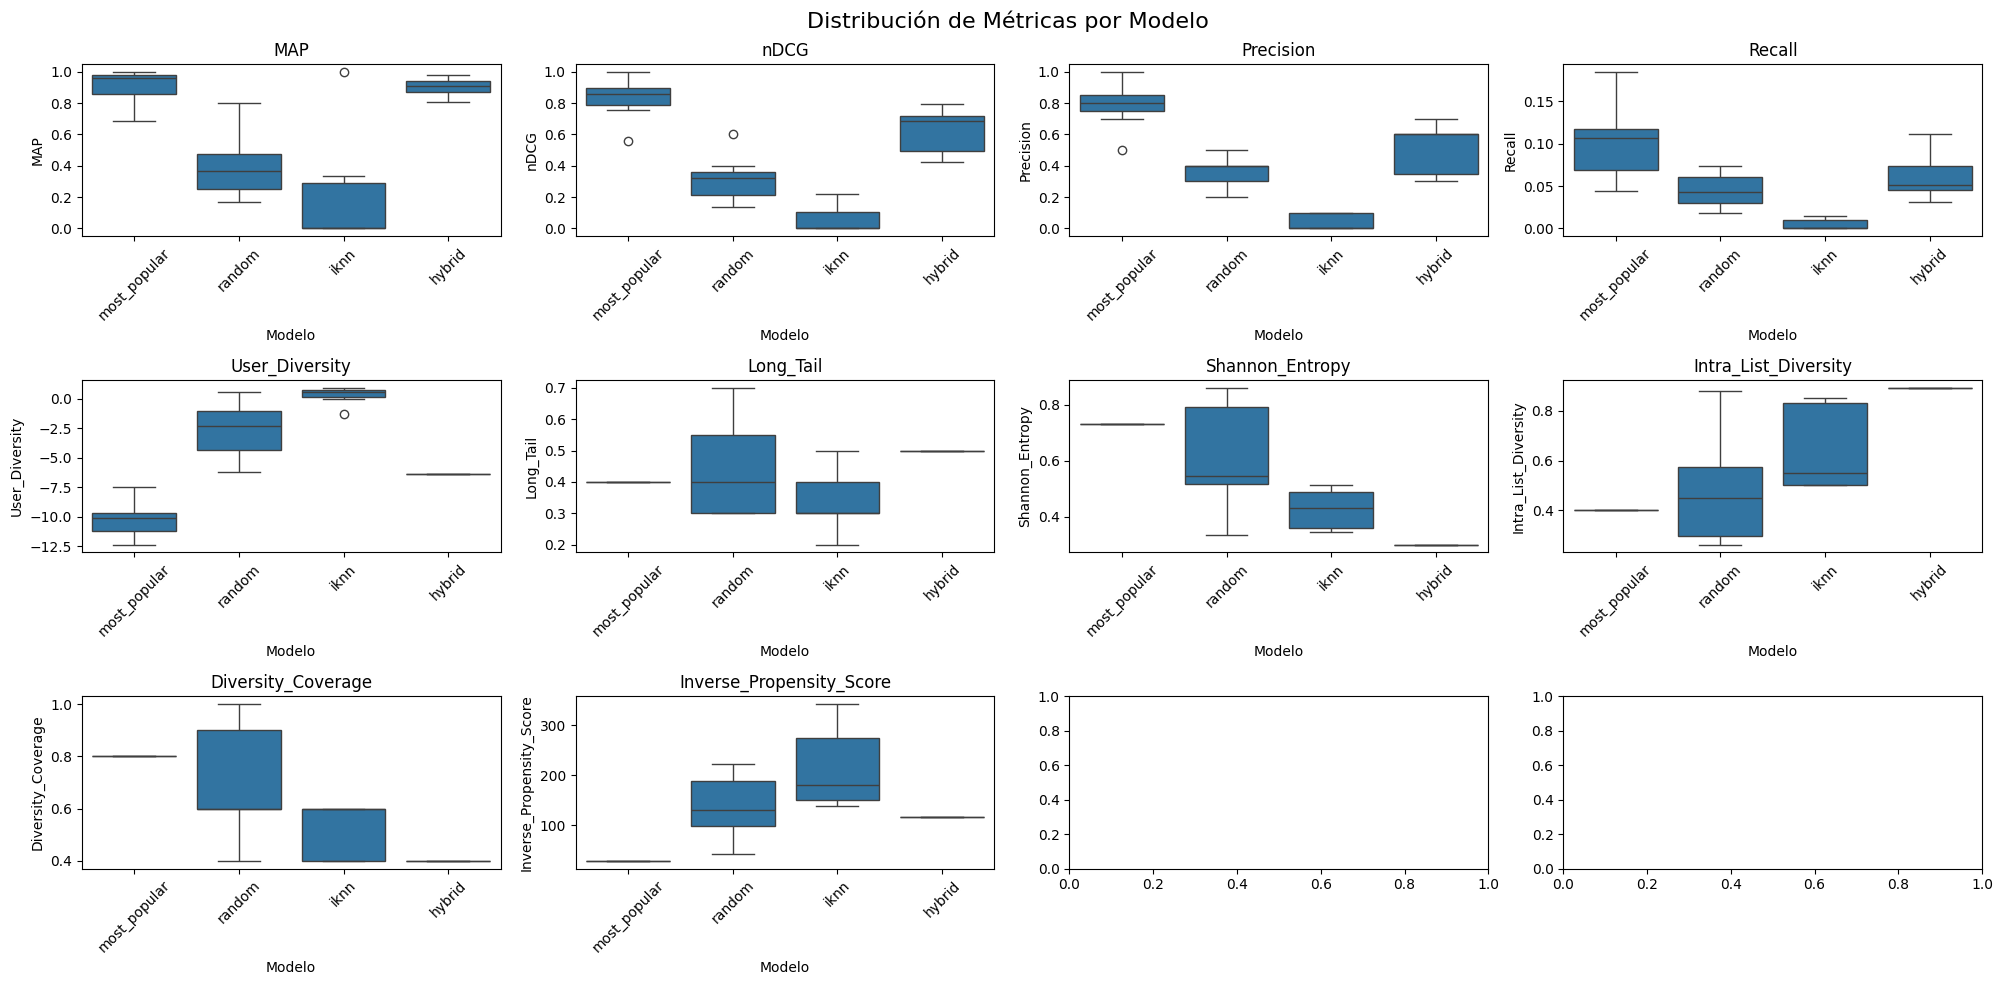

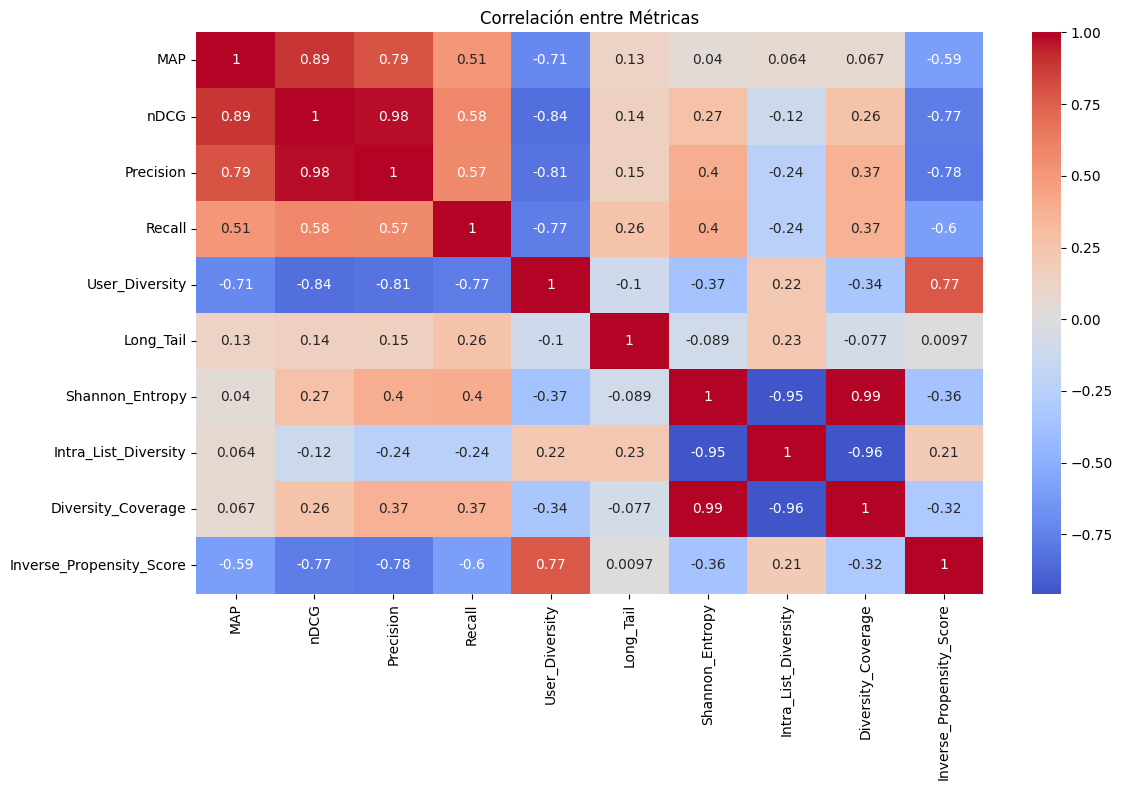

/var/folders/2s/1hvpny4j17scrm637kv0r9gh0000gn/T/ipykernel_3808/764842209.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  values = np.concatenate((normalized_metrics.loc[model], [normalized_metrics.loc[model][0]]))


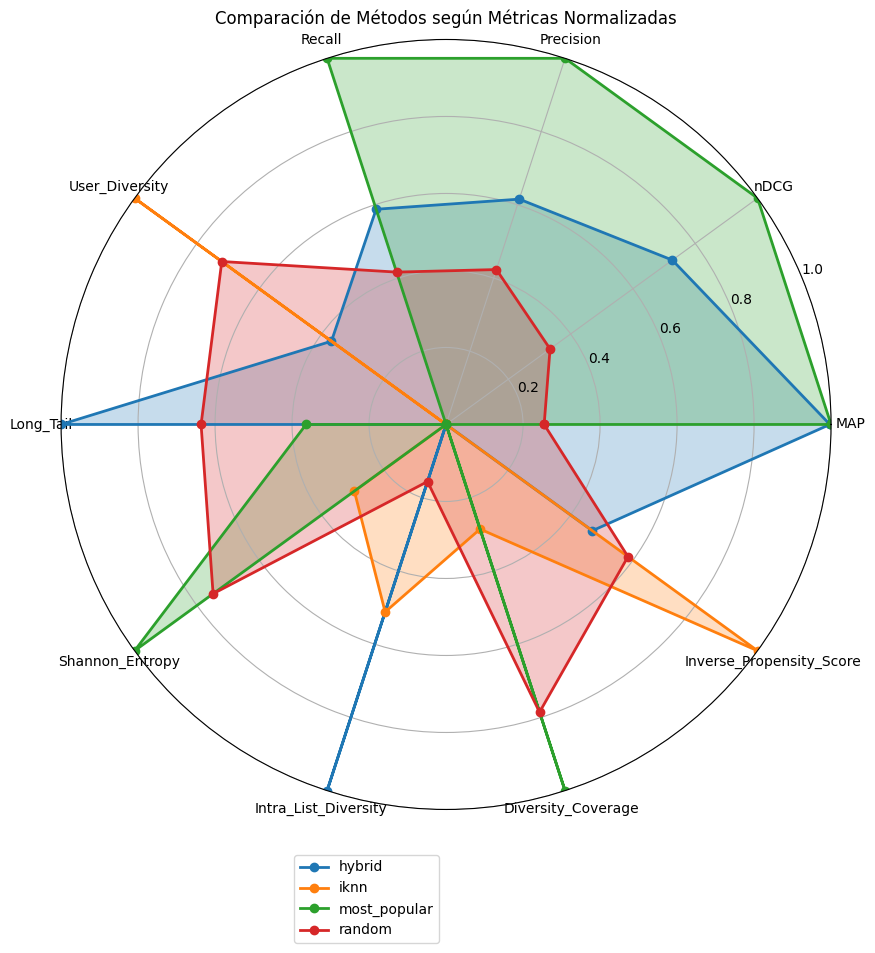

Promedios de Métricas por modelo:
              user_id     MAP    nDCG  Precision  Recall  User_Diversity  \
model                                                                      
hybrid            3.0  0.9020  0.6178     0.5000  0.0617         -6.3692   
iknn              3.0  0.2262  0.0607     0.0429  0.0051          0.2750   
most_popular      3.0  0.9041  0.8277     0.7857  0.1015        -10.2375   
random            3.0  0.3989  0.3168     0.3571  0.0452         -2.6672   

              Long_Tail  Shannon_Entropy  Intra_List_Diversity  \
model                                                            
hybrid           0.5000           0.3007                0.8929   
iknn             0.3429           0.4277                0.6524   
most_popular     0.4000           0.7320                0.4000   
random           0.4429           0.6233                0.4769   

              Diversity_Coverage  Inverse_Propensity_Score  
model                                              

In [137]:
# Obtener dataframe de resultados
results_df = global_metrics(data_music_test, data_music_train, 10, 5, alpha_hybrid=0.5, beta_lt=0.4, lambda_ips=0.5)

# Analisis estadistico usando nuestra funcion
analyze_global_metrics(results_df)

# Guardar dataframe de resultados
results_df.to_csv('global_metrics_results.csv', index=False)
print("DataFrame de resultados guardado en 'global_metrics_results.csv'")

Graficar ahora con distintos `top_n`para ver como se comportan las metricas de los distintos modelos.

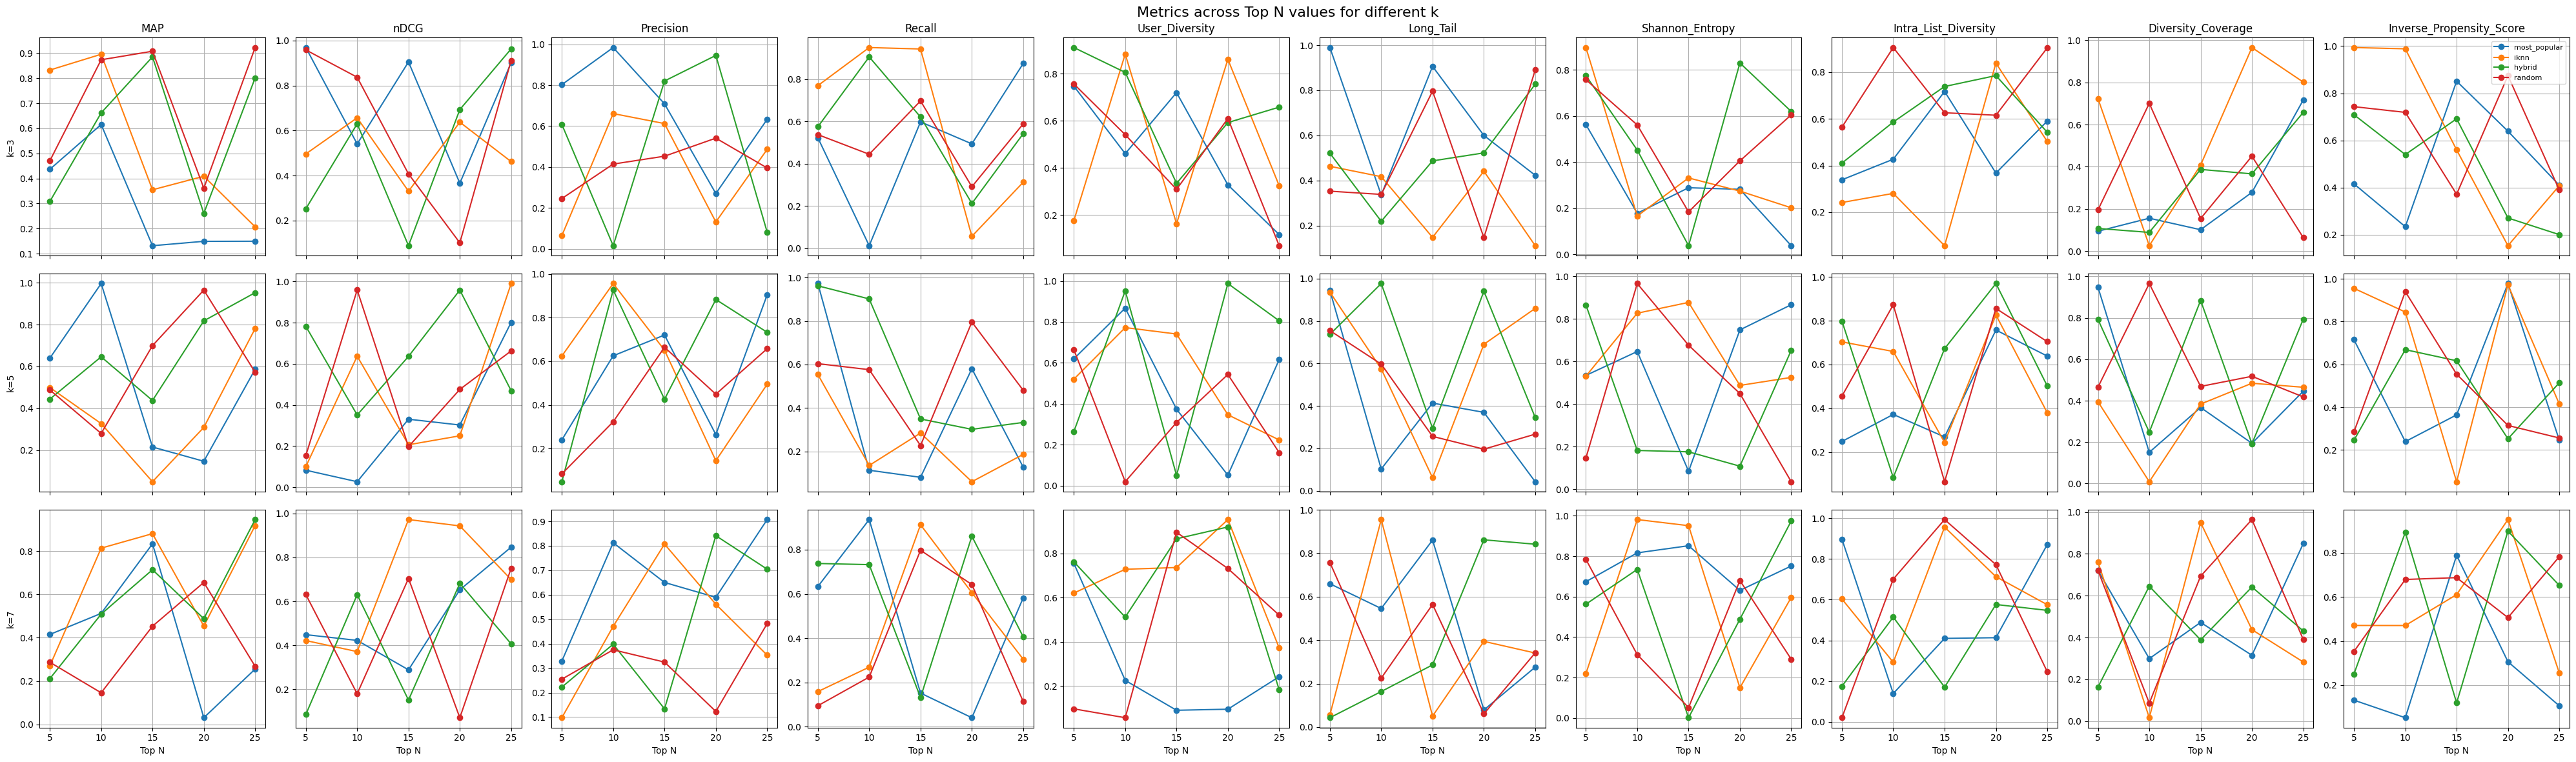

In [138]:
# Actualización de los modelos
models = ['most_popular', 'iknn', 'hybrid', 'random']
metrics = ['MAP', 'nDCG', 'Precision', 'Recall', 'User_Diversity', 'Long_Tail', 'Shannon_Entropy',
           'Intra_List_Diversity', 'Diversity_Coverage', 'Inverse_Propensity_Score']
top_n_list = [5, 10, 15, 20, 25]
k_category_list = [3, 5, 7]

# Crear datos simulados nuevamente para incluir los modelos actualizados
data = []
for model in models:
    for k in k_category_list:
        for top_n in top_n_list:
            values = np.random.rand(len(metrics))
            data.append([model, k, top_n] + list(values))

# Crear DataFrame actualizado
columns = ['model', 'k', 'top_n'] + metrics
df = pd.DataFrame(data, columns=columns)

# Crear figura con filas como k y columnas como métricas
fig, axes = plt.subplots(len(k_category_list), len(metrics), figsize=(40, 12), sharex=True, sharey=False)
fig.suptitle("Metrics across Top N values for different k", fontsize=16)

for i, k in enumerate(k_category_list):
    df_k = df[df['k'] == k]  # Filtrar por k

    for j, metric in enumerate(metrics):
        ax = axes[i, j]
        for model in models:
            df_model = df_k[df_k['model'] == model]
            ax.plot(df_model['top_n'], df_model[metric], label=model, marker='o')

        if i == 0:  # Títulos de las columnas (métricas)
            ax.set_title(metric)

        if j == 0:  # Etiquetas para cada fila (k)
            ax.set_ylabel(f"k={k}")

        ax.grid(True)
        if i == len(k_category_list) - 1:  # Etiqueta del eje X solo en la última fila
            ax.set_xlabel("Top N")

        if i == 0 and j == len(metrics) - 1:  # Solo una vez, agregar leyenda
            ax.legend(loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()
